Мы хотели обучить модель на постах из "Подслушано"

In [0]:
#!pip install PIL

!pip install wordcloud
! pip install stop_words
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import urllib.request  # импортируем модуль
import re
import json
! pip install gensim
import gensim
import logging
import pandas as pd
import urllib.request
from gensim.models import word2vec
import codecs,re,os
from pymystem3 import Mystem
import codecs, os, sys, pickle
import gensim
from gensim import corpora, models
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian')
from nltk import FreqDist
from nltk.collocations import * 
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/Colab Notebooks'

  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 all_lemm_stop_n2.csv		       d2v.model
 all_lemm_stop_n2.gsheet	       fearful.csv
 ANYA_TAKE_THIS_2.csv		       grandmas.csv
 ANYA_TAKE_THIS.csv		       result.csv
 besit.csv			       seminar_1.ipynb
 child.csv			       sents_with_mistakes.txt
 comm.jpg			       spellcheck.ipynb
 communities.data		       TANYA_TAKE_THIS_2.csv
'Copy of overhear doc2vec (1).ipynb'   Untitled0.ipynb
'Copy of overhear doc2vec.ipynb'       Untitled1.ipynb
'Copy of автобрея дз 3'		       work.csv
 corpus_ng.txt			      'автобрея дз 3.ipynb'
 correct_sents.txt		      'Проект по дата сайнсу.ipynb'
 d2v2.model


Скачиваем посты из вк

In [0]:
import csv
def rqst(iters):
  offset = 8001
  for i in range(iters):
    link = 'https://api.vk.com/method/wall.get?domain=overhear&offset={}&count=100&v=10.92&access_token=3ee301dc3ee301dc3ee301dc6f3e880f1f33ee33ee301dc621d2e17c851fb2b17234195'.format(str(offset))
    req = urllib.request.Request(link) 
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result)
    with open('/content/drive/My Drive/Colab Notebooks/result.csv', 'a', newline='', encoding='utf8') as f:
      writer = csv.writer(f, delimiter=',')
      for i in range(100):
        h = [data['response']['items'][i]['text']]  
        writer.writerow(h)
    offset += 100
      
      
def extract(name):
  dict = {}
  with open('/content/drive/My Drive/Colab Notebooks/result.csv', newline='') as file:  
    reader = csv.reader(file)
    for row in reader:
        if name in row[0]:
          a = row[0]
          tag = re.findall(r'Подслушано_\w*', a)
          tags = str(tag)
          post = re.sub(r'\n\n','', a)
          post = re.sub(r'#Подслушано\w*@overhear', '', post)
          k = str(post)
          dict[k] = name
  return dict
  
  

Поскольку там категорий очень много, мы решили взять 6 и и выкачать для каждой 850 постов

In [0]:
a = extract('Подслушано_детство')
b = extract('Подслушано_работа')
c = extract('Подслушано_БЕСИТ')
d = extract('Подслушано_бабушки')
e = extract('Подслушано_страшное')
f = extract('Подслушано_наблюдения')
print(len(a), len(b), len(c), len(d), len(e), len(f))
alltexts0 = '\n\n'.join(list(a.keys()))
alltexts1 = '\n\n'.join(list(b.keys()))
alltexts2 = '\n\n'.join(list(c.keys()))
alltexts3 = '\n\n'.join(list(d.keys()))
alltexts4 = '\n\n'.join(list(e.keys()))
alltexts5 = '\n\n'.join(list(f.keys()))

3072 2405 1271 860 2176 3155


In [0]:
def writetopic(filename, namelist):
  filename = '/content/drive/My Drive/Colab Notebooks/{}.csv'.format(filename)
  with open(filename, 'w', newline='', encoding='utf8') as file:
      writer = csv.writer(file, delimiter=',')
      for i in range(850):
        line = list(namelist.keys())[i]
        line = re.sub('\n', ' ',line)
        writer.writerow([line])

In [0]:
writetopic('child', a)

In [0]:
writetopic('work', b)

In [0]:
writetopic('besit', c)

In [0]:
writetopic('grandmas', d)

In [0]:
writetopic('fearful', e)

In [0]:
writetopic('observe', f)

Ура, мы все выкачали! Теперь лемматизируем

In [0]:
!pip install pymystem3
import re
from pymystem3 import Mystem


from stop_words import get_stop_words
ru_stop = get_stop_words('ru')


mystem_object = Mystem()
mystem_object.start()

In [0]:
import re
import csv
from pymystem3 import Mystem #ОООЧЕНЬ ДОЛГО


from stop_words import get_stop_words
ru_stop = get_stop_words('ru')


mystem_object = Mystem()
mystem_object.start()



def processFile(): 
    arr = ['grandmas', 'observe', 'besit', 'child', 'fearful', 'work']
    with open('/content/drive/My Drive/Colab Notebooks/all_lemm_stop_n.csv', 'a', newline='', encoding='utf8') as w:
        writer = csv.writer(w, delimiter=',')
        for name in arr:
            print(name)            
            with open('/content/drive/My Drive/Colab Notebooks/'+name+'.csv', 'r', encoding='utf-8')as f:
                reader = csv.reader(f)
                for line in reader:
                    string = ''
                    
                    words = mystem_object.analyze(line[0])
                
                    for word in words:
                        if word.get('analysis') != None and word.get('analysis') != []:
                            if word['analysis'][0]['lex'] == 'не':
                                s = word['analysis'][0]['lex'] + '_'
                            else:
                                if word['analysis'][0]['lex'] not in ru_stop:
                                    s = word['analysis'][0]['lex'] + ' '
                                else:
                                    continue
                            string += s
                   # print(string)    
                    writer.writerow([string, name])
    print('Done')
    



Майстем очень долгий, поэтому решили работать с пайморфи

In [0]:
import re
import csv
import pymorphy2
pmm = pymorphy2.MorphAnalyzer()



from stop_words import get_stop_words
ru_stop = get_stop_words('ru')


mystem_object = Mystem()
mystem_object.start()



def processFile(): 
    arr = ['grandmas', 'observe', 'besit', 'child', 'fearful', 'work']
    with open('all_lemm_stop_n2.csv', 'w', newline='', encoding='utf8') as w:
        writer = csv.writer(w, delimiter=',')
        for name in arr:
            print(name)            
            with open(name+'.csv', 'r', encoding='utf-8')as f:
                reader = csv.reader(f)
                for line in reader:
                    string = ''
                    
                    words = line[0].split(' ')
                    words = [w.strip(',\.\"!–?-\'\"\(\)\"-::—;)(\«\»\W')   for w in words]
                    for word in words:
                        tmp = pmm.normal_forms(word)[0]
                        if tmp == 'не':
                            s = tmp + '_'
                        else:
                            if tmp not in ru_stop:
                                s = tmp + ' '
                            else:
                                continue
                        
                        string += s
                   # print(string)    
                    string = re.sub('\s+', ' ', string )        
                    writer.writerow([string, name])
    print('Done')
    

clean_doc = processFile()

Делаем облако слов для каждой категории

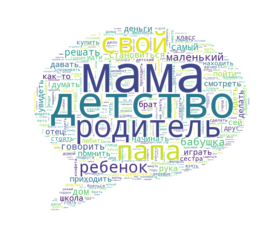

In [0]:
#text = data['response']['items'][3]['text']
with open('/content/drive/My Drive/Colab Notebooks/child_lemm_stop_n.txt', 'r', encoding = 'utf-8') as file11:
  text = file11.read()
#text = alltexts0
# картинка, в форме которой будет облако слов (это необязательно, по умолчанию — прямоугольник)
# важно: картинка для маски должна быть в jpeg
comment_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/comm.jpg"))

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask)

# генерируем
cloud.generate(text)

# визуализируем
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
cloud.to_file("post_cloud.png")

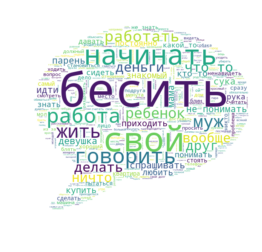

In [0]:
#text = data['response']['items'][3]['text']
with open('/content/drive/My Drive/Colab Notebooks/besit_lemm_stop_n.txt', 'r', encoding = 'utf-8') as file11:
  text = file11.read()
#text = alltexts0
# картинка, в форме которой будет облако слов (это необязательно, по умолчанию — прямоугольник)
# важно: картинка для маски должна быть в jpeg
comment_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/comm.jpg"))

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask)

# генерируем
cloud.generate(text)

# визуализируем
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
cloud.to_file("post_cloud.png")

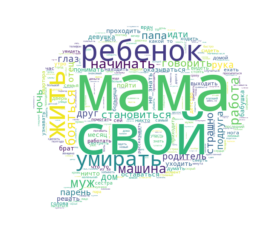

In [0]:
#text = data['response']['items'][3]['text']
with open('/content/drive/My Drive/Colab Notebooks/fearful_lemm_stop_n.txt', 'r', encoding = 'utf-8') as file11:
  text = file11.read()
#text = alltexts0
# картинка, в форме которой будет облако слов (это необязательно, по умолчанию — прямоугольник)
# важно: картинка для маски должна быть в jpeg
comment_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/comm.jpg"))

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask)

# генерируем
cloud.generate(text)

# визуализируем
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
cloud.to_file("post_cloud.png")

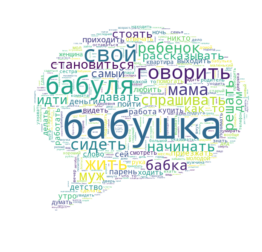

In [0]:
#text = data['response']['items'][3]['text']
with open('/content/drive/My Drive/Colab Notebooks/grandmas_lemm_stop_n.txt', 'r', encoding = 'utf-8') as file11:
  text = file11.read()
#text = alltexts0
# картинка, в форме которой будет облако слов (это необязательно, по умолчанию — прямоугольник)
# важно: картинка для маски должна быть в jpeg
comment_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/comm.jpg"))

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask)

# генерируем
cloud.generate(text)

# визуализируем
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
cloud.to_file("post_cloud.png")

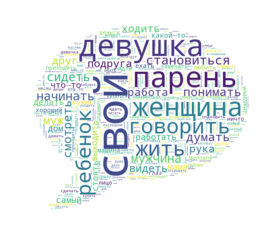

In [0]:
#text = data['response']['items'][3]['text']
with open('/content/drive/My Drive/Colab Notebooks/observe_lemm_stop_n.txt', 'r', encoding = 'utf-8') as file11:
  text = file11.read()
#text = alltexts0
# картинка, в форме которой будет облако слов (это необязательно, по умолчанию — прямоугольник)
# важно: картинка для маски должна быть в jpeg
comment_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/comm.jpg"))

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask)

# генерируем
cloud.generate(text)

# визуализируем
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
cloud.to_file("post_cloud.png")

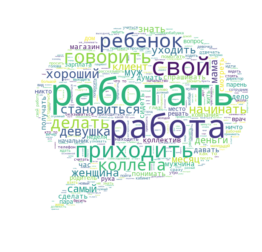

In [0]:
#text = data['response']['items'][3]['text']
with open('/content/drive/My Drive/Colab Notebooks/work_lemm_stop_n.txt', 'r', encoding = 'utf-8') as file11:
  text = file11.read()
#text = alltexts0
# картинка, в форме которой будет облако слов (это необязательно, по умолчанию — прямоугольник)
# важно: картинка для маски должна быть в jpeg
comment_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/comm.jpg"))

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask)

# генерируем
cloud.generate(text)

# визуализируем
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
cloud.to_file("post_cloud.png")

Поразвлекались с облаком слов, пора бы и модели пообучать

In [0]:
from gensim.models import doc2vec

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
corpus = pd.read_csv('/content/drive/My Drive/Colab Notebooks/all_lemm_stop_n2.csv')

In [0]:
! pip install stop_words

from stop_words import get_stop_words
ru_stop = get_stop_words('ru')

In [0]:
def delete_stopwords(text):
    new_text = []
    for word in text.split(', '):
        word = word.strip("[]'")
        if word not in ru_stop:
            new_text.append(word)
    return new_text
  #corpus['body'] = corpus['body'].apply(delete_stopwords)

In [0]:
def spl(text):
  new_text = text.split(' ')
  return new_text

In [0]:
corpus['body'] = corpus['body'].apply(spl)

In [0]:
corpus.head()

,body,topic
0,"[когда-то, прыщавый, подросток, прям, сильно, ...",grandmas
1,"[маршрутка, встретить, необычный, бабуля, одет...",grandmas
2,"[маленькая, жить, ряд, бабушка, ходить, школа,...",grandmas
3,"[учить, бабушка, пользоваться, палочка, суши, ...",grandmas
4,"[90-е, поселковый, кинотеатр, завезти, невидал...",grandmas


In [0]:
type(corpus['body'][0])

list

In [0]:
news1 = corpus['body'][0]

Пытаемся в вордтувек, чтобы потом посчитать tf-idf

In [0]:
%%time
from gensim.models import Word2Vec

model = Word2Vec(corpus['body'], size=300, window=5, min_count=1, iter=10)
model.init_sims(replace = True)
model.save("word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 12 s, sys: 488 ms, total: 12.4 s
Wall time: 7.3 s


In [0]:
from collections import Counter
from math import log
def tfidf(word, doc, doclist):
    docwords = [item for docum in doclist for item in docum]
    tf = Counter(doc)[word] / len(doc)
    idf = log(len(docwords) / Counter(docwords)[word])
    return tf * idf

In [0]:
texts = list(corpus['body'])

In [0]:
corpus['body_tfidf'] = corpus['body'].apply(lambda x: sum([tfidf(word, x, texts) * np.array(model[word]) for word in x]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
corpus.head()

,body,topic,body_tfidf
0,"[когда-то, прыщавый, подросток, прям, сильно, ...",grandmas,"[0.34157705, -0.0009988776, 0.5615092, 0.33925..."
1,"[маршрутка, встретить, необычный, бабуля, одет...",grandmas,"[0.29448926, -0.031214854, 0.49986058, 0.29591..."
2,"[маленькая, жить, ряд, бабушка, ходить, школа,...",grandmas,"[0.32880035, 0.0037165196, 0.5425412, 0.323840..."
3,"[учить, бабушка, пользоваться, палочка, суши, ...",grandmas,"[0.3473483, -0.0067194575, 0.57917696, 0.34233..."
4,"[90-е, поселковый, кинотеатр, завезти, невидал...",grandmas,"[0.33292404, -0.0093724355, 0.55672663, 0.3195..."


In [0]:
for_clf = pd.DataFrame(list(corpus['body_tfidf']))

In [0]:
for_clf['topic'] = corpus['topic']

In [0]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
X = for_clf.drop(['topic'], axis=1)
y = for_clf['topic']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
best_score = 0
best_params = (None, None)
for n_trees in range(1, 15):
    for max_depth in range(3, 25):
        cl = RandomForestClassifier(n_estimators=n_trees, max_depth=max_depth)
        scores = cross_validate(cl, X_train, y_train, cv=3, scoring='accuracy')['test_score']
        current_score = sum(scores) / len(scores)
        if current_score > best_score:
            best_score = current_score
            best_params = (n_trees, max_depth)
print(best_score, best_params)

0.2823542245472623 (13, 5)


In [0]:
clf = RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1])
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_pred=predicted, y_true=y_test)
# посмотреть и расстроиться

In [0]:
print(accuracy)

0.2901960784313726


Непонятно почему, но все очень плохо

In [0]:
tagged = [doc2vec.TaggedDocument(words=[word for text in corpus['body'] for word in text], tags=[i for i in range(len(corpus))])]

In [0]:
model = doc2vec.Doc2Vec(vector_size=300,
                alpha=0.025, 
                min_alpha=0.00025,
                min_count=5,
                dm =1)
model.build_vocab(tagged)

In [0]:
max_epochs = 40
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39


In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/d2v3.model")
print("Model Saved")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model Saved


In [0]:
print(model.infer_vector(corpus['body'][0]))

[-2.02254683e-01 -9.90006775e-02 -1.17111742e-01  2.47912947e-02
  4.15605679e-02 -1.71910733e-01  2.29666140e-02  1.12995848e-01
  6.81649819e-02  1.69038519e-01  6.33606240e-02 -5.00732288e-02
 -1.99985355e-01  7.46219009e-02  1.40142322e-01 -1.00951612e-01
  4.03765477e-02 -1.45208135e-01 -8.53882506e-02 -2.60963850e-02
 -5.33162281e-02 -8.05936232e-02 -1.20394200e-01  9.65266302e-02
 -4.04821932e-02  5.98059371e-02 -1.70139402e-01 -1.58633236e-02
  2.07997561e-02  1.92463584e-02  6.56220363e-04 -1.87710449e-01
 -6.28721565e-02 -5.97275347e-02  1.34141333e-02  3.40288468e-02
  5.74621791e-03 -9.52092484e-02  1.48248196e-01  8.92732292e-02
 -1.11807371e-03  6.19743988e-02 -9.83584747e-02 -5.04653975e-02
  1.44182622e-01  1.11768186e-01  4.62701246e-02 -1.88576505e-02
  7.66223595e-02  8.72773379e-02  7.81189427e-02 -1.35453582e-01
  4.33094241e-02 -1.09018952e-01  5.79551868e-02  3.23568657e-02
 -1.29913971e-01  9.33322757e-02 -1.90855134e-02  1.74332798e-01
 -3.38578343e-01 -7.71204

In [0]:

corpus['body'] = corpus['body'].apply(model.infer_vector)

In [0]:
corpus.head()

,body,topic,body_tfidf
0,"[-0.17475712, -0.061757755, -0.03604954, 0.171...",grandmas,"[0.34157705, -0.0009988776, 0.5615092, 0.33925..."
1,"[-0.3596469, -0.137583, -0.10855194, 0.2764037...",grandmas,"[0.29448926, -0.031214854, 0.49986058, 0.29591..."
2,"[-0.34830126, -0.15350685, -0.073289655, 0.453...",grandmas,"[0.32880035, 0.0037165196, 0.5425412, 0.323840..."
3,"[-0.39179885, -0.16464859, -0.11803526, 0.3501...",grandmas,"[0.3473483, -0.0067194575, 0.57917696, 0.34233..."
4,"[-0.5308694, -0.23218271, -0.19101214, 0.41219...",grandmas,"[0.33292404, -0.0093724355, 0.55672663, 0.3195..."


In [0]:
corpus.to_csv('/content/drive/My Drive/Colab Notebooks/TAKE_THIS_2.csv')

In [0]:
import numpy as np

In [0]:
trial = np.array(corpus['body'])

In [0]:
trial

array([array([-1.74757123e-01, -6.17577545e-02, -3.60495411e-02,  1.71411410e-01,
       -3.97536904e-02,  3.30771841e-02,  1.72274143e-01,  1.30948484e-01,
       -1.91261292e-01, -1.49233518e-02,  2.38244176e-01,  1.85455292e-01,
        1.35753557e-01,  6.28707837e-03, -1.56199887e-01, -1.21377893e-01,
        6.90416619e-02,  2.22484067e-01, -6.00854643e-02,  1.18946798e-01,
        6.12416677e-02,  2.14753877e-02,  6.02569357e-02, -3.78048159e-02,
       -3.99940126e-02,  1.85753386e-02, -4.31685448e-02, -1.37739241e-01,
       -1.80337355e-01,  3.05293314e-02,  5.83294034e-02, -1.45183295e-01,
        3.07176765e-02, -1.56863496e-01,  1.32173179e-02,  1.11990303e-01,
        3.00888401e-02,  5.19753434e-02, -2.05345273e-01,  1.89911425e-01,
        2.08079875e-01, -5.86030260e-02, -2.65532643e-01,  3.80441323e-02,
        1.20878570e-01, -1.30375326e-01, -1.08062215e-01,  1.13305403e-02,
       -2.00858936e-01,  7.36966953e-02,  6.24889731e-02, -7.58474544e-02,
        1.05271786

In [0]:
X = [i for i in range(len(corpus['body']))]
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=7)
len(X)

5100

In [0]:
train = [0,0,0,0,0,0,0]
test = [0,0,0,0,0,0,0]
i = 0
for train_indices, test_indices in k_fold.split(X):
  train[i], test[i] = train_indices, test_indices
  i += 1
  #print('Train: %s | test: %s' % (train_indices.head(), test_indices.head()))

In [0]:
print(len(corpus['body']))

5100


In [0]:
x_tr, y_tr, x_tst, y_tst = [[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[]]
for i in range(7):
  for n in X:    
    if n in train[i]:
      x_tr[i].append(corpus['body'][n])
      y_tr[i].append(corpus['topic'][n])
    if n in test[i]:
      x_tst[i].append(corpus['body'][n])
      y_tst[i].append(corpus['topic'][n])

Пытаемся посчитать регрессию

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logit = LogisticRegression(n_jobs=-1, random_state=7)
logit.fit(x_tr[0], y_tr[0])


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=7,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
pred = []
for i in range(7):
  kkk = round(logit.score(x_tr[i], y_tr[i]), 3), round(logit.score(x_tst[i], y_tst[i]), 3),
  pred.append(kkk)


In [0]:
print(pred)


[(0.26, 0.0), (0.225, 0.211), (0.21, 0.298), (0.206, 0.325), (0.21, 0.298), (0.208, 0.313), (0.241, 0.115)]


In [0]:
mf = [ff[0] for ff in pred]
ms = [ss[1] for ss in pred]


In [0]:
np.mean(mf)

0.22285714285714286

In [0]:
np.mean(ms)

0.22285714285714286

Все стало еще хуже

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [0]:
corpus2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/all_lemm_stop_n2.csv')
X = [i for i in range(len(corpus2['body']))]
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=7)
len(X)
train = [0,0,0,0,0,0,0]
test = [0,0,0,0,0,0,0]
i = 0
for train_indices, test_indices in k_fold.split(X):
  train[i], test[i] = train_indices, test_indices
  i += 1
  #print('Train: %s | test: %s' % (train_indices.head(), test_indices.head()))
x_tr1, y_tr1, x_tst1, y_tst1 = [[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[]]
for i in range(7):
  for n in X:    
    if n in train[i]:
      x_tr1[i].append(corpus2['body'][n])
      y_tr1[i].append(corpus2['topic'][n])
    if n in test[i]:
      x_tst1[i].append(corpus2['body'][n])
      y_tst1[i].append(corpus2['topic'][n])

In [0]:
cv = CountVectorizer()
cv.fit(corpus2['body'])
len(cv.vocabulary_)
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[500:550])

['00', '000', '033', '04', '05', '06', '10', '100', '1000', '100500', '101', '102', '108', '10890', '10900', '11', '110', '11000', '12', '120', '1200', '13', '130', '130к', '14', '15', '150', '1500', '150к', '155', '16', '160', '165', '17', '170', '172', '173', '175', '18', '180', '1812', '182', '185', '1855', '1897', '19', '1902', '1920', '1935', '1937']
['аллергик', 'аллергия', 'аллея', 'алмат', 'ало', 'алопеция', 'алтай', 'алтайский', 'алфавит', 'алчный', 'алый', 'альбом', 'альп', 'альпинизм', 'альпинист', 'альтаир', 'альтернативный', 'альф', 'альфа', 'альфачный', 'альфонс', 'альцгеймер', 'алюминиевый', 'алюминий', 'амазона', 'аматоксин', 'амбал', 'амбидекстр', 'амбициозный', 'амбиция', 'амебок', 'америка', 'американец', 'американский', 'америкать', 'амиго', 'амплитуда', 'ампутация', 'ампутированный', 'ампутировать', 'амстафф', 'амстердам', 'амуниция', 'амур', 'ан', 'ана', 'анал', 'анализ', 'анализировать', 'аналогичный']


In [0]:
import numpy as np
from sklearn.metrics import accuracy_score
result_counter = []
acc = []
for i in range(4): 
  X_train = cv.transform(x_tr1[i])
  X_test = cv.transform(x_tst1[i])
  %%time
  logit = LogisticRegression(n_jobs=-1, random_state=7)
  logit.fit(X_train, y_tr1[i])
  predicted = logit.predict(X_test)
  accuracy = accuracy_score(y_pred = predicted, y_true = y_tst1[0])
  res  = round(logit.score(X_train, y_tr1[0]), 3), round(logit.score(X_test, y_tst1[0]), 3),
  result_counter.append(res)
  acc.append(accuracy)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [0]:
print(result_counter)
print('точность для тренировочной выборки', np.mean([n[0] for n in result_counter])) #точность для тренировочной выборки
print('точность для тестовой выборки', np.mean([n[1] for n in result_counter])) #точность для тестовой выборки
print('accuracy: ',np.mean(acc))     

[(1.0, 0.42), (0.861, 0.214), (0.722, 0.026), (0.583, 0.051)]
точность для тренировочной выборки 0.7915000000000001
точность для тестовой выборки 0.17775000000000002
accuracy:  0.17764060356652947
